### Importação dos dados



In [83]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


## 1. Análise do faturamento



In [84]:
lojas=(loja1,loja2,loja3,loja4)
faturamentos=[]

for loja in lojas:
    faturamentos.append(loja.Preço.sum())

In [85]:
for loja in lojas:
    print(loja.isnull().sum())

Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
dtype: int64
Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
dtype: int64
Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                   

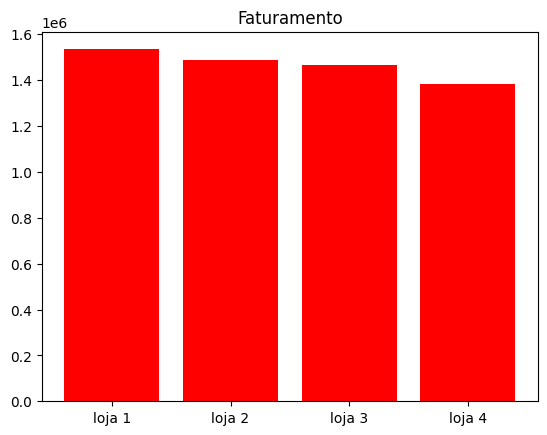

A Loja 1 faturou R$1534509.12
A Loja 2 faturou R$1488459.06
A Loja 3 faturou R$1464025.03
A Loja 4 faturou R$1384497.58


In [86]:
plt.bar(('loja 1','loja 2','loja 3','loja 4'),faturamentos,color='red')
plt.title('Faturamento')
plt.show()

for i in range(4):
    print(f'A Loja {i+1} faturou R${faturamentos[i]}')

A Loja 1 possui o faturamento de $R\$1534509.12$, a maior entre as demais.

Já a loja 4 possui o faturamento de $R\$1384497.58$, sendo o menor faturamento.

# 2. Vendas por Categoria

In [87]:

loja1['Categoria do Produto'].unique()
loja4['Categoria do Produto'].value_counts().sort_values(ascending=False)

Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer          277
eletrodomesticos         254
utilidades domesticas    201
livros                   187
instrumentos musicais    170
Name: count, dtype: int64

In [88]:
lista_contagem=[]
nome_lojas=('Loja 1','Loja 2','Loja 3','Loja 4')

for loja,nome in zip(lojas,nome_lojas):
    contagemCategoria=loja['Categoria do Produto'].value_counts().sort_values(ascending=False)
    contagemCategoria.name=nome
    lista_contagem.append(contagemCategoria)

contagemProdutos=pd.concat(lista_contagem,axis=1)
contagemProdutos

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
moveis,465,442,499,480
eletronicos,448,422,451,451
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
utilidades domesticas,171,181,177,201


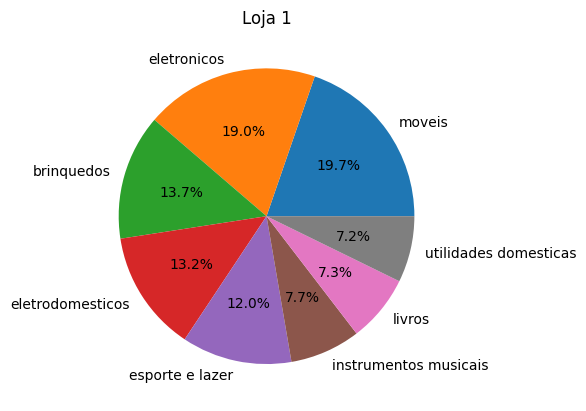

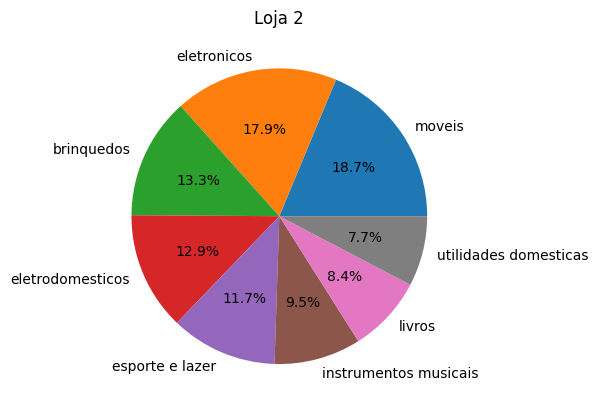

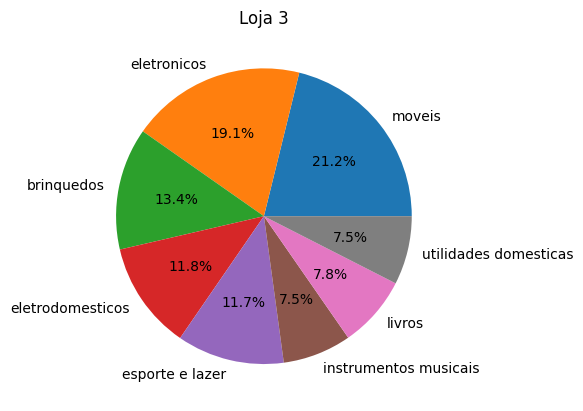

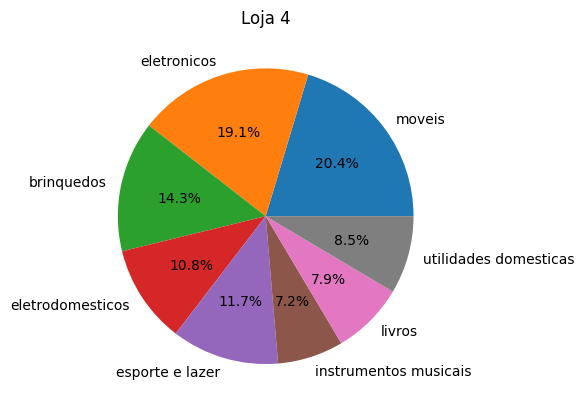

In [89]:
for coluna in nome_lojas:
    contagemProdutos[coluna].plot(kind='pie',autopct='%.1f%%')
    plt.title(coluna)
    plt.ylabel('')
    plt.show()


In [90]:
for coluna in nome_lojas:
    lojaContagem=contagemProdutos[coluna]
    maisVendidos=lojaContagem.nlargest(3)
    print(f'Os categorias mais vendidas pela {coluna} foram {maisVendidos.index[0]}, {maisVendidos.index[1]} e {maisVendidos.index[2]}')
    

Os categorias mais vendidas pela Loja 1 foram moveis, eletronicos e brinquedos
Os categorias mais vendidas pela Loja 2 foram moveis, eletronicos e brinquedos
Os categorias mais vendidas pela Loja 3 foram moveis, eletronicos e brinquedos
Os categorias mais vendidas pela Loja 4 foram moveis, eletronicos e brinquedos


# 3. Média de Avaliação das Lojas


In [91]:
lista_avaliacoes=[]

for loja,nome in zip(lojas,nome_lojas):
    avaliacao=loja['Avaliação da compra'].mean()
    lista_avaliacoes.append(avaliacao)

    print(f'A {nome} tem avaliação {avaliacao:.2f}')

A Loja 1 tem avaliação 3.98
A Loja 2 tem avaliação 4.04
A Loja 3 tem avaliação 4.05
A Loja 4 tem avaliação 4.00


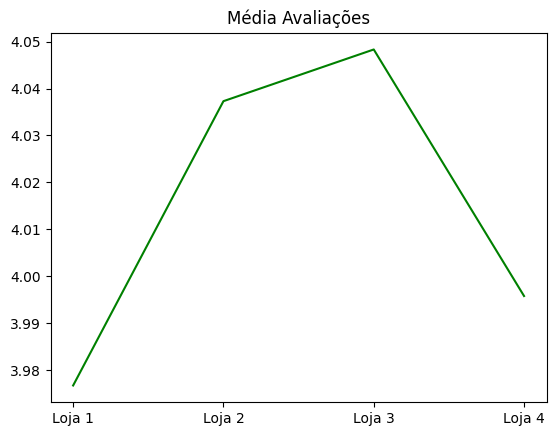

In [92]:
plt.plot(nome_lojas,lista_avaliacoes,color='green')
plt.title('Média Avaliações')
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [93]:
for coluna in nome_lojas:
    lojaContagem=contagemProdutos[coluna]
    topVendas=lojaContagem.idxmax()
    botVendas=lojaContagem.idxmin()
    print(f'Para a {coluna} {topVendas} foi a categoria mais vendida e {botVendas} a menos vendida')


Para a Loja 1 moveis foi a categoria mais vendida e utilidades domesticas a menos vendida
Para a Loja 2 moveis foi a categoria mais vendida e utilidades domesticas a menos vendida
Para a Loja 3 moveis foi a categoria mais vendida e instrumentos musicais a menos vendida
Para a Loja 4 moveis foi a categoria mais vendida e instrumentos musicais a menos vendida


# 5. Frete Médio por Loja

In [94]:
listaFrete=[]

for loja,nome in zip(lojas,nome_lojas):
    freteMedio=loja['Frete'].mean()
    serieFrete=pd.Series({nome:freteMedio})
    listaFrete.append(serieFrete)

dfFrete=pd.concat(listaFrete,axis=0).to_frame(name='Frete')
dfFrete

,Frete
Loja 1,34.691805
Loja 2,33.621941
Loja 3,33.074464
Loja 4,31.278997


In [95]:
loja1.Frete.mean()

np.float64(34.69180491551149)